In [15]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 924.9 kB/s eta 0:00:001m735.5 kB/s eta 0:00:01


In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report 
from imblearn.over_sampling import SMOTE
from sklearn import linear_model

In [2]:
def load_data():
    matches_df = pd.read_csv('data_selected.csv')
    y = matches_df.loc[:, 'label']
    y.replace({-1:2,1:1,0:0},inplace=True)
    X = matches_df.drop('label', axis=1)
    return X, y

In [3]:
def normalize_data(X):
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    return X

In [4]:
X, y = load_data()
X = normalize_data(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0, stratify=y)

In [13]:
model_svc = SVC()
param_svc = {'C': [0.1, 1, 10, 100, 1000], 
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel': ['rbf', 'polynomial'],
             'degree': [2, 3, 4]
             } 

model_grid_svm = GridSearchCV(model_svc,param_svc, n_jobs=-1)
model_grid_svm.fit(X_train, y_train)
model_grid_svm.cv_results_

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
375 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
375 fits failed with the following error:
Traceback (most recent call last):
  File "/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/svm/_base.py", line 251, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/svm/_

NameError: name 'model_grid' is not defined

In [16]:
model_grid_svm.best_estimator_

SVC(C=1000, degree=2, gamma=0.0001)

In [14]:
model_grid_svm.cv_results_

{'mean_fit_time': array([1.32626706e+02, 1.34529114e-02, 1.20059402e+02, 1.35776520e-02,
        1.24580592e+02, 1.96908474e-02, 1.22148535e+02, 1.40200138e-02,
        1.22139702e+02, 1.67698860e-02, 1.34942953e+02, 2.54386425e-02,
        1.22895809e+02, 2.87684917e-02, 1.23522235e+02, 1.73965931e-02,
        1.19560977e+02, 1.64234638e-02, 1.20101896e+02, 1.78991795e-02,
        1.31934678e+02, 2.20214367e-02, 1.20161399e+02, 1.78199768e-02,
        1.23757586e+02, 2.02186584e-02, 1.23257718e+02, 1.75306797e-02,
        1.19991179e+02, 1.65870190e-02, 1.28596501e+02, 1.71650887e-02,
        1.28649482e+02, 2.03639030e-02, 1.20431983e+02, 2.55455494e-02,
        1.20163186e+02, 1.69447899e-02, 1.18661559e+02, 1.41250134e-02,
        1.27796134e+02, 1.48195744e-02, 1.29465754e+02, 1.73795700e-02,
        1.22215948e+02, 1.82547092e-02, 1.17932597e+02, 1.90916538e-02,
        1.21143854e+02, 2.31100559e-02, 1.26536077e+02, 3.16434383e-02,
        1.26785883e+02, 3.37266445e-02, 1.19607

In [17]:
svc = SVC(C=1000, degree=2, gamma=0.0001)
svc.fit(X_train, y_train)
accuracy_score(svc.predict(X_test), y_test)

0.533347584437794

In [7]:
X, y = load_data()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0, stratify=y)

In [10]:
model_gnb = GaussianNB()
model_gnb = model_gnb.fit(X_train, y_train)
accuracy_score(model_gnb.predict(X_test), y_test)

0.4997862334330911

<AxesSubplot:ylabel='Frequency'>

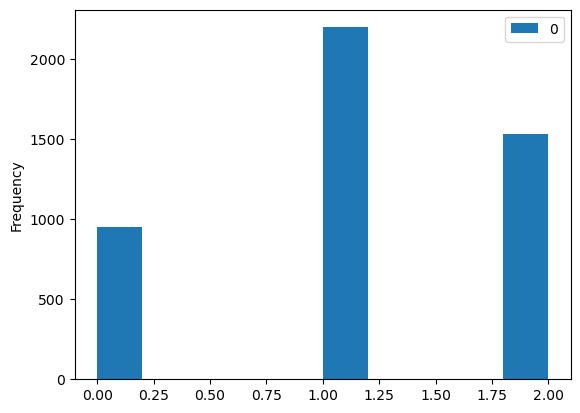

In [11]:
pd.DataFrame(model_gnb.predict(X_test)).plot.hist()

In [14]:
print(classification_report(model_gnb.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.24      0.30      0.26       950
           1       0.63      0.61      0.62      2197
           2       0.53      0.47      0.50      1531

    accuracy                           0.50      4678
   macro avg       0.46      0.46      0.46      4678
weighted avg       0.52      0.50      0.51      4678



In [25]:
smote = SMOTE(random_state=0)
X, y = load_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0, stratify=y)
X_res, y_res = smote.fit_resample(X_train, y_train)

<AxesSubplot:ylabel='Frequency'>

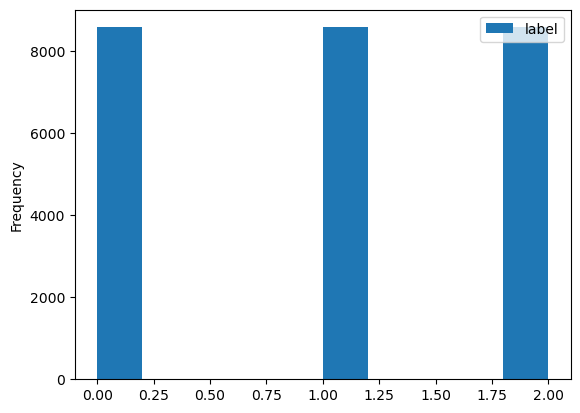

In [26]:
pd.DataFrame(y_res).plot.hist()

In [27]:
model_gnb = GaussianNB()
model_gnb = model_gnb.fit(X_res, y_res)
accuracy_score(model_gnb.predict(X_test), y_test)

0.4717828131680205

In [28]:
print(classification_report(model_gnb.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.35      0.29      0.32      1466
           1       0.50      0.64      0.56      1685
           2       0.53      0.46      0.49      1527

    accuracy                           0.47      4678
   macro avg       0.46      0.46      0.46      4678
weighted avg       0.46      0.47      0.46      4678



In [29]:
model_xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=2, min_child_weight=10, n_estimators=100, n_jobs=32,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1.0, tree_method='exact', validate_parameters=1,
              verbosity=1)
model_xgb.fit(X_res,y_res)
y_pred = model_xgb.predict(X_test)
accuracy_score(y_pred,y_test)

0.496579734929457

In [31]:
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
accuracy_score(y_pred,y_test)

0.5303548525010688

In [12]:
from sklearn.model_selection import GridSearchCV

params = {
        'penalty': ['l1', 'l2', 'elasticnet'],
        'class_weight': ['balanced',
                         {0: 0.5, 1: 0.25, 2: 0.25}, 
                         {0: 0.4, 1: 0.3, 2: 0.3},
                         {0: 0.6, 1: 0.2, 2: 0.2},
                         {0: 0.6, 1: 0.15, 2: 0.25}
                        ],
        'solver': ['liblinear'],
        'multi_class': ['ovr', 'multinomial']
        }

model = linear_model.LogisticRegression(random_state=0, verbose=1, n_jobs=-1)
model_lrg = GridSearchCV(model, params)
model_lrg.fit(X_train, y_train)
model_lrg.cv_results_

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


[LibLinear]iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 11
iter   6  #CD cycles 1
iter   7  #CD cycles 60
iter   8  #CD cycles 12
iter   9  #CD cycles 1
iter  10  #CD cycles 109
iter  11  #CD cycles 1
iter  12  #CD cycles 247
iter  13  #CD cycles 1
iter  14  #CD cycles 525
iter  15  #CD cycles 31
optimization finished, #iter = 15
Objective value = 9945.480344
#nonzeros/#features = 26/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 3
iter   4  #CD cycles 1
iter   5  #CD cycles 9
iter   6  #CD cycles 1
iter   7  #CD cycles 33
iter   8  #CD cycles 3
iter   9  #CD cycles 3
iter  10  #CD cycles 3
iter  11  #CD cycles 1
iter  12  #CD cycles 94
iter  13  #CD cycles 8
iter  14  #CD cycles 2
iter  15  #CD cycles 1
iter  16  #CD cycles 122
iter  17  #CD cycles 54
iter  18  #CD cycles 1
iter  19  #CD cycles 338
iter  20  #CD cycles 44
optimization finished, #iter = 20
Objective value = 7789.672915
#nonzeros/

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


iter   9  #CD cycles 153
iter  10  #CD cycles 1
iter  11  #CD cycles 289
iter  12  #CD cycles 1
iter  13  #CD cycles 468
iter  14  #CD cycles 6
optimization finished, #iter = 14
Objective value = 9943.962917
#nonzeros/#features = 26/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 3
iter   4  #CD cycles 1
iter   5  #CD cycles 8
iter   6  #CD cycles 1
iter   7  #CD cycles 38
iter   8  #CD cycles 1
iter   9  #CD cycles 98
iter  10  #CD cycles 3
iter  11  #CD cycles 1
iter  12  #CD cycles 129
iter  13  #CD cycles 17
iter  14  #CD cycles 11
iter  15  #CD cycles 1
iter  16  #CD cycles 272
iter  17  #CD cycles 24
iter  18  #CD cycles 7
optimization finished, #iter = 18
Objective value = 7813.412131
#nonzeros/#features = 29/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 5
iter   5  #CD cycles 3
iter   6  #CD cycles 1
iter   7  #CD cycles 19
iter   8  #CD cycles 3
iter   9  #CD cycles 2
iter  10  #CD cycles 1
iter  11  #CD cycl

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


iter  11  #CD cycles 138
iter  12  #CD cycles 1
iter  13  #CD cycles 281
iter  14  #CD cycles 10
iter  15  #CD cycles 10
iter  16  #CD cycles 7
iter  17  #CD cycles 4
iter  18  #CD cycles 2
iter  19  #CD cycles 2
iter  20  #CD cycles 3
iter  21  #CD cycles 4
iter  22  #CD cycles 1
iter  23  #CD cycles 364
iter  24  #CD cycles 22
optimization finished, #iter = 24
Objective value = 9949.534424
#nonzeros/#features = 27/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 3
iter   4  #CD cycles 1
iter   5  #CD cycles 7
iter   6  #CD cycles 3
iter   7  #CD cycles 1
iter   8  #CD cycles 26
iter   9  #CD cycles 8
iter  10  #CD cycles 3
iter  11  #CD cycles 2
iter  12  #CD cycles 1
iter  13  #CD cycles 74
iter  14  #CD cycles 9
iter  15  #CD cycles 1
iter  16  #CD cycles 144
iter  17  #CD cycles 1
iter  18  #CD cycles 193
optimization finished, #iter = 18
Objective value = 7801.931950
#nonzeros/#features = 26/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycle

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


iter   9  #CD cycles 133
iter  10  #CD cycles 1
iter  11  #CD cycles 180
iter  12  #CD cycles 1
iter  13  #CD cycles 194
optimization finished, #iter = 13
Objective value = 9944.437670
#nonzeros/#features = 25/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 3
iter   4  #CD cycles 1
iter   5  #CD cycles 10
iter   6  #CD cycles 1
iter   7  #CD cycles 14
iter   8  #CD cycles 7
iter   9  #CD cycles 2
iter  10  #CD cycles 2
iter  11  #CD cycles 1
iter  12  #CD cycles 93
iter  13  #CD cycles 3
iter  14  #CD cycles 2
iter  15  #CD cycles 1
iter  16  #CD cycles 170
iter  17  #CD cycles 7
iter  18  #CD cycles 1
iter  19  #CD cycles 212
optimization finished, #iter = 19
Objective value = 7808.125460
#nonzeros/#features = 25/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 7
iter   5  #CD cycles 1
iter   6  #CD cycles 21
iter   7  #CD cycles 1
iter   8  #CD cycles 73
iter   9  #CD cycles 5
iter  10  #CD cycles 5
iter  11  #CD cycle

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


iter  11  #CD cycles 121
iter  12  #CD cycles 1
iter  13  #CD cycles 227
iter  14  #CD cycles 2
iter  15  #CD cycles 1
iter  16  #CD cycles 406
optimization finished, #iter = 16
Objective value = 9937.369768
#nonzeros/#features = 25/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 4
iter   4  #CD cycles 1
iter   5  #CD cycles 8
iter   6  #CD cycles 3
iter   7  #CD cycles 1
iter   8  #CD cycles 34
iter   9  #CD cycles 9
iter  10  #CD cycles 1
iter  11  #CD cycles 85
iter  12  #CD cycles 2
iter  13  #CD cycles 1
iter  14  #CD cycles 151
iter  15  #CD cycles 7
iter  16  #CD cycles 1
iter  17  #CD cycles 272
iter  18  #CD cycles 63
iter  19  #CD cycles 4
optimization finished, #iter = 19
Objective value = 7770.764289
#nonzeros/#features = 27/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 8
iter   5  #CD cycles 3
iter   6  #CD cycles 1
iter   7  #CD cycles 15
iter   8  #CD cycles 4
iter   9  #CD cycles 1
iter  10  #CD cycles

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(
/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


cg reaches trust region boundary
iter  4 act 5.718e+00 pre 5.720e+00 delta 5.227e-01 f 9.951e+03 |g| 2.716e+01 CG   3
cg reaches trust region boundary
iter  5 act 5.625e+00 pre 5.617e+00 delta 6.846e-01 f 9.945e+03 |g| 2.802e+01 CG   3
cg reaches trust region boundary
iter  6 act 1.945e+00 pre 1.941e+00 delta 6.922e-01 f 9.940e+03 |g| 8.314e+00 CG   6
iter  7 act 6.139e-02 pre 6.139e-02 delta 6.922e-01 f 9.938e+03 |g| 1.843e+00 CG   8
iter  1 act 1.215e+03 pre 1.140e+03 delta 2.809e+00 f 9.076e+03 |g| 5.380e+03 CG   2
iter  2 act 3.335e+01 pre 3.201e+01 delta 2.809e+00 f 7.860e+03 |g| 6.008e+02 CG   2
iter  3 act 2.351e+01 pre 2.350e+01 delta 2.809e+00 f 7.827e+03 |g| 4.777e+01 CG   5
iter  4 act 1.025e+00 pre 1.025e+00 delta 2.809e+00 f 7.804e+03 |g| 1.381e+01 CG   7
iter  5 act 2.126e-02 pre 2.126e-02 delta 2.809e+00 f 7.803e+03 |g| 8.290e-01 CG   8
iter  1 act 1.034e+03 pre 1.011e+03 delta 2.110e-01 f 1.085e+04 |g| 9.807e+03 CG   1
cg reaches trust region boundary
iter  2 act 1.249e

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(
/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


cg reaches trust region boundary
iter  4 act 7.757e+00 pre 7.760e+00 delta 5.350e-01 f 9.959e+03 |g| 3.504e+01 CG   3
cg reaches trust region boundary
iter  5 act 5.913e+00 pre 5.903e+00 delta 6.611e-01 f 9.952e+03 |g| 2.593e+01 CG   3
iter  6 act 1.736e+00 pre 1.733e+00 delta 6.611e-01 f 9.946e+03 |g| 9.367e+00 CG   7
iter  7 act 8.120e-03 pre 8.118e-03 delta 6.611e-01 f 9.944e+03 |g| 2.043e+00 CG   5
iter  1 act 1.224e+03 pre 1.147e+03 delta 2.836e+00 f 9.076e+03 |g| 5.404e+03 CG   2
iter  2 act 3.524e+01 pre 3.379e+01 delta 2.836e+00 f 7.852e+03 |g| 6.087e+02 CG   2
iter  3 act 2.452e+01 pre 2.450e+01 delta 2.836e+00 f 7.817e+03 |g| 5.044e+01 CG   5
iter  4 act 5.763e-01 pre 5.759e-01 delta 2.836e+00 f 7.792e+03 |g| 1.488e+01 CG   5
iter  5 act 6.229e-02 pre 6.228e-02 delta 2.836e+00 f 7.792e+03 |g| 1.208e+00 CG   8
iter  1 act 1.035e+03 pre 1.013e+03 delta 2.109e-01 f 1.085e+04 |g| 9.825e+03 CG   1
cg reaches trust region boundary
iter  2 act 1.258e+02 pre 1.251e+02 delta 4.886e-01

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


iter  3 act 2.819e+01 pre 2.817e+01 delta 2.881e+00 f 7.789e+03 |g| 5.406e+01 CG   5
iter  4 act 4.070e-01 pre 4.067e-01 delta 2.881e+00 f 7.760e+03 |g| 1.684e+01 CG   5
iter  5 act 2.277e-02 pre 2.277e-02 delta 2.881e+00 f 7.760e+03 |g| 7.515e-01 CG   7
iter  1 act 1.037e+03 pre 1.015e+03 delta 2.111e-01 f 1.085e+04 |g| 9.833e+03 CG   1
cg reaches trust region boundary
iter  2 act 1.254e+02 pre 1.247e+02 delta 4.999e-01 f 9.811e+03 |g| 7.947e+02 CG   2
cg reaches trust region boundary
iter  3 act 3.081e+02 pre 3.098e+02 delta 1.627e+00 f 9.685e+03 |g| 1.307e+03 CG   2
cg reaches trust region boundary
iter  4 act 5.765e+02 pre 5.579e+02 delta 2.412e+00 f 9.377e+03 |g| 6.500e+02 CG   2
iter  5 act 1.394e+02 pre 1.316e+02 delta 2.412e+00 f 8.801e+03 |g| 2.380e+02 CG   4
iter  6 act 1.869e+00 pre 1.847e+00 delta 2.412e+00 f 8.661e+03 |g| 1.186e+02 CG   2
iter  7 act 2.543e+00 pre 2.542e+00 delta 2.412e+00 f 8.659e+03 |g| 9.023e+00 CG   7
iter  8 act 2.492e-02 pre 2.492e-02 delta 2.412e+00

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


iter  11  #CD cycles 86
iter  12  #CD cycles 3
iter  13  #CD cycles 1
iter  14  #CD cycles 152
iter  15  #CD cycles 1
iter  16  #CD cycles 353
optimization finished, #iter = 16
Objective value = 5403.397725
#nonzeros/#features = 23/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 4
iter   5  #CD cycles 1
iter   6  #CD cycles 9
iter   7  #CD cycles 2
iter   8  #CD cycles 1
iter   9  #CD cycles 27
iter  10  #CD cycles 13
iter  11  #CD cycles 3
iter  12  #CD cycles 1
iter  13  #CD cycles 117
iter  14  #CD cycles 1
iter  15  #CD cycles 247
iter  16  #CD cycles 2
iter  17  #CD cycles 16
iter  18  #CD cycles 6
iter  19  #CD cycles 16
optimization finished, #iter = 19
Objective value = 4127.640659
#nonzeros/#features = 27/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 8
iter   6  #CD cycles 2
iter   7  #CD cycles 1
iter   8  #CD cycles 21
iter   9  #CD cycles 1
iter  10  #CD cycles

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


iter   5  #CD cycles 4
iter   6  #CD cycles 1
iter   7  #CD cycles 36
iter   8  #CD cycles 2
iter   9  #CD cycles 1
iter  10  #CD cycles 102
iter  11  #CD cycles 8
iter  12  #CD cycles 1
iter  13  #CD cycles 139
iter  14  #CD cycles 35
iter  15  #CD cycles 2
iter  16  #CD cycles 1
iter  17  #CD cycles 271
optimization finished, #iter = 17
Objective value = 5402.951736
#nonzeros/#features = 22/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 2
iter   5  #CD cycles 1
iter   6  #CD cycles 9
iter   7  #CD cycles 1
iter   8  #CD cycles 49
iter   9  #CD cycles 1
iter  10  #CD cycles 163
iter  11  #CD cycles 5
iter  12  #CD cycles 6
iter  13  #CD cycles 1
iter  14  #CD cycles 134
optimization finished, #iter = 14
Objective value = 4138.877027
#nonzeros/#features = 26/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 6
iter   6  #CD cycles 2
iter   7  #CD cycles 1
iter   8  #CD cycles 

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


iter  13  #CD cycles 120
iter  14  #CD cycles 11
iter  15  #CD cycles 6
iter  16  #CD cycles 2
iter  17  #CD cycles 1
iter  18  #CD cycles 292
iter  19  #CD cycles 9
optimization finished, #iter = 19
Objective value = 5405.466113
#nonzeros/#features = 22/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 2
iter   5  #CD cycles 1
iter   6  #CD cycles 7
iter   7  #CD cycles 2
iter   8  #CD cycles 1
iter   9  #CD cycles 20
iter  10  #CD cycles 5
iter  11  #CD cycles 1
iter  12  #CD cycles 93
iter  13  #CD cycles 12
iter  14  #CD cycles 5
iter  15  #CD cycles 1
iter  16  #CD cycles 217
iter  17  #CD cycles 2
optimization finished, #iter = 17
Objective value = 4134.681521
#nonzeros/#features = 27/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 8
iter   6  #CD cycles 1
iter   7  #CD cycles 20
iter   8  #CD cycles 5
iter   9  #CD cycles 1
iter  10  #CD cycles 88
iter  11  #CD cycles 6

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


iter   9  #CD cycles 4
iter  10  #CD cycles 1
iter  11  #CD cycles 102
iter  12  #CD cycles 10
iter  13  #CD cycles 1
iter  14  #CD cycles 106
iter  15  #CD cycles 2
iter  16  #CD cycles 1
iter  17  #CD cycles 248
optimization finished, #iter = 17
Objective value = 5402.770778
#nonzeros/#features = 22/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 3
iter   5  #CD cycles 1
iter   6  #CD cycles 10
iter   7  #CD cycles 1
iter   8  #CD cycles 36
iter   9  #CD cycles 2
iter  10  #CD cycles 1
iter  11  #CD cycles 123
iter  12  #CD cycles 1
iter  13  #CD cycles 243
iter  14  #CD cycles 4
iter  15  #CD cycles 12
iter  16  #CD cycles 1
optimization finished, #iter = 16
Objective value = 4138.411376
#nonzeros/#features = 26/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 8
iter   6  #CD cycles 1
iter   7  #CD cycles 23
iter   8  #CD cycles 2
iter   9  #CD cycles 2
iter  10  #CD cycle

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


iter   9  #CD cycles 95
iter  10  #CD cycles 12
iter  11  #CD cycles 3
iter  12  #CD cycles 1
iter  13  #CD cycles 120
iter  14  #CD cycles 3
iter  15  #CD cycles 1
iter  16  #CD cycles 208
optimization finished, #iter = 16
Objective value = 5399.797968
#nonzeros/#features = 20/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 3
iter   5  #CD cycles 1
iter   6  #CD cycles 9
iter   7  #CD cycles 2
iter   8  #CD cycles 1
iter   9  #CD cycles 42
iter  10  #CD cycles 11
iter  11  #CD cycles 3
iter  12  #CD cycles 2
iter  13  #CD cycles 1
iter  14  #CD cycles 120
iter  15  #CD cycles 19
iter  16  #CD cycles 1
iter  17  #CD cycles 246
iter  18  #CD cycles 15
iter  19  #CD cycles 1
optimization finished, #iter = 19
Objective value = 4117.381669
#nonzeros/#features = 26/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 9
iter   6  #CD cycles 2
iter   7  #CD cycles 2
iter   8  #CD cycles

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(
/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


iter  5 act 1.468e+01 pre 1.405e+01 delta 2.055e+00 f 4.143e+03 |g| 2.926e+02 CG   2
iter  6 act 1.082e+01 pre 1.080e+01 delta 2.055e+00 f 4.128e+03 |g| 3.180e+01 CG   5
iter  7 act 9.416e-03 pre 9.409e-03 delta 2.055e+00 f 4.117e+03 |g| 1.710e+01 CG   1
iter  8 act 2.093e-01 pre 2.092e-01 delta 2.055e+00 f 4.117e+03 |g| 1.626e+00 CG   7
iter  1 act 4.211e+03 pre 3.835e+03 delta 5.131e-01 f 8.135e+03 |g| 1.657e+04 CG   1
iter  2 act 2.626e+02 pre 2.349e+02 delta 5.131e-01 f 3.924e+03 |g| 3.002e+03 CG   1
cg reaches trust region boundary
iter  3 act 1.099e+02 pre 1.085e+02 delta 1.642e+00 f 3.661e+03 |g| 5.493e+02 CG   2
cg reaches trust region boundary
iter  4 act 1.705e+02 pre 1.899e+02 delta 1.937e+00 f 3.551e+03 |g| 1.806e+02 CG   2
iter  5 act 4.467e+01 pre 4.200e+01 delta 1.937e+00 f 3.381e+03 |g| 1.093e+03 CG   1
cg reaches trust region boundary
iter  6 act 7.522e+01 pre 7.278e+01 delta 2.016e+00 f 3.336e+03 |g| 1.282e+02 CG   4
iter  7 act 1.170e+00 pre 1.156e+00 delta 2.016e+00

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(
/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


cg reaches trust region boundary
iter  6 act 7.434e+01 pre 7.187e+01 delta 1.994e+00 f 3.337e+03 |g| 1.305e+02 CG   4
iter  7 act 1.161e+00 pre 1.147e+00 delta 1.994e+00 f 3.262e+03 |g| 1.631e+02 CG   1
iter  8 act 6.030e+00 pre 5.996e+00 delta 1.994e+00 f 3.261e+03 |g| 1.376e+01 CG   5
iter  9 act 7.166e-03 pre 7.159e-03 delta 1.994e+00 f 3.255e+03 |g| 1.263e+01 CG   1
iter 10 act 5.713e-02 pre 5.709e-02 delta 1.994e+00 f 3.255e+03 |g| 8.204e-01 CG   7
[LibLinear]iter  1 act 3.490e+03 pre 3.239e+03 delta 4.362e-01 f 9.057e+03 |g| 1.610e+04 CG   1
iter  2 act 1.184e+02 pre 1.109e+02 delta 4.362e-01 f 5.568e+03 |g| 2.338e+03 CG   1
cg reaches trust region boundary
iter  3 act 2.838e+01 pre 2.817e+01 delta 8.799e-01 f 5.449e+03 |g| 2.476e+02 CG   2
cg reaches trust region boundary
iter  4 act 1.868e+01 pre 1.838e+01 delta 9.192e-01 f 5.421e+03 |g| 4.559e+01 CG   4
iter  5 act 3.649e+00 pre 3.628e+00 delta 9.192e-01 f 5.402e+03 |g| 3.829e+01 CG   4
iter  6 act 3.178e-01 pre 3.167e-01 delt

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(
/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


[LibLinear]iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 2
iter   6  #CD cycles 1
iter   7  #CD cycles 30
iter   8  #CD cycles 2
iter   9  #CD cycles 1
iter  10  #CD cycles 92
iter  11  #CD cycles 1
iter  12  #CD cycles 125
iter  13  #CD cycles 1
iter  14  #CD cycles 238
optimization finished, #iter = 14
Objective value = 4639.283601
#nonzeros/#features = 23/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 2
iter   5  #CD cycles 2
iter   6  #CD cycles 1
iter   7  #CD cycles 9
iter   8  #CD cycles 2
iter   9  #CD cycles 1
iter  10  #CD cycles 51
iter  11  #CD cycles 1
iter  12  #CD cycles 111
iter  13  #CD cycles 7
iter  14  #CD cycles 6
iter  15  #CD cycles 1
iter  16  #CD cycles 299
iter  17  #CD cycles 4
optimization finished, #iter = 17
Objective value = 4632.761060
#nonzeros/#features = 28/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #C

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


iter  14  #CD cycles 129
iter  15  #CD cycles 3
iter  16  #CD cycles 1
iter  17  #CD cycles 267
optimization finished, #iter = 17
Objective value = 4638.847145
#nonzeros/#features = 18/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 4
iter   5  #CD cycles 1
iter   6  #CD cycles 7
iter   7  #CD cycles 3
iter   8  #CD cycles 1
iter   9  #CD cycles 41
iter  10  #CD cycles 2
iter  11  #CD cycles 2
iter  12  #CD cycles 8
iter  13  #CD cycles 1
iter  14  #CD cycles 126
iter  15  #CD cycles 3
iter  16  #CD cycles 1
iter  17  #CD cycles 140
iter  18  #CD cycles 10
iter  19  #CD cycles 3
iter  20  #CD cycles 8
optimization finished, #iter = 20
Objective value = 4645.707917
#nonzeros/#features = 27/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 7
iter   6  #CD cycles 2
iter   7  #CD cycles 1
iter   8  #CD cycles 27
iter   9  #CD cycles 4
iter  10  #CD cycles 5
iter  11  #CD cycles 1


/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


iter  12  #CD cycles 109
iter  13  #CD cycles 5
iter  14  #CD cycles 1
iter  15  #CD cycles 308
optimization finished, #iter = 15
Objective value = 4640.992554
#nonzeros/#features = 22/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 3
iter   5  #CD cycles 1
iter   6  #CD cycles 9
iter   7  #CD cycles 2
iter   8  #CD cycles 1
iter   9  #CD cycles 44
iter  10  #CD cycles 3
iter  11  #CD cycles 1
iter  12  #CD cycles 111
iter  13  #CD cycles 1
iter  14  #CD cycles 170
optimization finished, #iter = 14
Objective value = 4640.653337
#nonzeros/#features = 26/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 9
iter   6  #CD cycles 2
iter   7  #CD cycles 1
iter   8  #CD cycles 19
iter   9  #CD cycles 9
iter  10  #CD cycles 5
iter  11  #CD cycles 4
iter  12  #CD cycles 1
iter  13  #CD cycles 81
iter  14  #CD cycles 1
iter  15  #CD cycles 158
iter  16  #CD cycles 2
iter  17  #CD cycles 

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


iter   8  #CD cycles 1
iter   9  #CD cycles 103
iter  10  #CD cycles 5
iter  11  #CD cycles 1
iter  12  #CD cycles 96
iter  13  #CD cycles 1
iter  14  #CD cycles 196
iter  15  #CD cycles 2
iter  16  #CD cycles 13
optimization finished, #iter = 16
Objective value = 4638.747386
#nonzeros/#features = 20/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 2
iter   5  #CD cycles 1
iter   6  #CD cycles 10
iter   7  #CD cycles 1
iter   8  #CD cycles 53
iter   9  #CD cycles 3
iter  10  #CD cycles 1
iter  11  #CD cycles 151
iter  12  #CD cycles 1
iter  13  #CD cycles 299
iter  14  #CD cycles 2
optimization finished, #iter = 14
Objective value = 4644.655280
#nonzeros/#features = 26/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 8
iter   6  #CD cycles 2
iter   7  #CD cycles 1
iter   8  #CD cycles 27
iter   9  #CD cycles 4
iter  10  #CD cycles 2
iter  11  #CD cycles 1
iter  12  #CD cycles 

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


iter  10  #CD cycles 80
iter  11  #CD cycles 12
iter  12  #CD cycles 9
iter  13  #CD cycles 1
iter  14  #CD cycles 142
iter  15  #CD cycles 1
iter  16  #CD cycles 150
iter  17  #CD cycles 18
iter  18  #CD cycles 14
optimization finished, #iter = 18
Objective value = 4636.375149
#nonzeros/#features = 20/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 4
iter   5  #CD cycles 1
iter   6  #CD cycles 11
iter   7  #CD cycles 2
iter   8  #CD cycles 2
iter   9  #CD cycles 1
iter  10  #CD cycles 54
iter  11  #CD cycles 3
iter  12  #CD cycles 1
iter  13  #CD cycles 118
iter  14  #CD cycles 3
iter  15  #CD cycles 1
iter  16  #CD cycles 240
iter  17  #CD cycles 3
optimization finished, #iter = 17
Objective value = 4621.157947
#nonzeros/#features = 27/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 7
iter   6  #CD cycles 1
iter   7  #CD cycles 23
iter   8  #CD cycles 8
iter   9  #CD cycle

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(
/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


iter  7 act 1.453e-02 pre 1.452e-02 delta 9.088e-01 f 4.635e+03 |g| 8.302e-01 CG   6
iter  1 act 1.858e+03 pre 1.759e+03 delta 3.572e-01 f 7.045e+03 |g| 1.044e+04 CG   1
cg reaches trust region boundary
iter  2 act 1.376e+02 pre 1.357e+02 delta 8.246e-01 f 5.187e+03 |g| 1.157e+03 CG   2
cg reaches trust region boundary
iter  3 act 1.916e+02 pre 1.939e+02 delta 2.116e+00 f 5.049e+03 |g| 2.886e+02 CG   1
iter  4 act 2.109e+02 pre 1.946e+02 delta 2.116e+00 f 4.858e+03 |g| 6.693e+02 CG   2
iter  5 act 1.303e+01 pre 1.254e+01 delta 2.116e+00 f 4.647e+03 |g| 3.269e+02 CG   2
iter  6 act 1.129e+01 pre 1.132e+01 delta 2.116e+00 f 4.634e+03 |g| 2.952e+01 CG   5
iter  7 act 1.737e-01 pre 1.733e-01 delta 2.116e+00 f 4.622e+03 |g| 1.660e+01 CG   3
iter  8 act 7.612e-02 pre 7.606e-02 delta 2.116e+00 f 4.622e+03 |g| 1.432e+00 CG   5
iter  1 act 3.928e+03 pre 3.598e+03 delta 4.890e-01 f 8.284e+03 |g| 1.620e+04 CG   1
iter  2 act 2.054e+02 pre 1.866e+02 delta 4.890e-01 f 4.357e+03 |g| 2.756e+03 CG   1

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(
/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


iter  3 act 1.159e+02 pre 1.148e+02 delta 1.887e+00 f 4.151e+03 |g| 4.610e+02 CG   2
cg reaches trust region boundary
iter  4 act 2.630e+02 pre 2.726e+02 delta 2.775e+00 f 4.035e+03 |g| 2.274e+02 CG   2
iter  5 act 6.497e+01 pre 5.944e+01 delta 2.775e+00 f 3.772e+03 |g| 5.461e+02 CG   2
iter  6 act 1.494e+01 pre 1.448e+01 delta 2.775e+00 f 3.707e+03 |g| 1.349e+02 CG   3
iter  7 act 1.344e+00 pre 1.336e+00 delta 2.775e+00 f 3.692e+03 |g| 2.814e+01 CG   4
iter  8 act 1.380e-01 pre 1.379e-01 delta 2.775e+00 f 3.690e+03 |g| 3.128e+00 CG   5
[LibLinear]iter  1 act 3.926e+03 pre 3.611e+03 delta 4.723e-01 f 8.794e+03 |g| 1.675e+04 CG   1
iter  2 act 1.796e+02 pre 1.648e+02 delta 4.723e-01 f 4.868e+03 |g| 2.721e+03 CG   1
cg reaches trust region boundary
iter  3 act 3.110e+01 pre 3.067e+01 delta 8.811e-01 f 4.688e+03 |g| 3.671e+02 CG   2
cg reaches trust region boundary
iter  4 act 1.842e+01 pre 1.804e+01 delta 9.095e-01 f 4.657e+03 |g| 4.570e+01 CG   3
cg reaches trust region boundary
iter  5

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(
/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 3
iter   6  #CD cycles 4
iter   7  #CD cycles 1
iter   8  #CD cycles 42
iter   9  #CD cycles 2
iter  10  #CD cycles 1
iter  11  #CD cycles 84
iter  12  #CD cycles 1
iter  13  #CD cycles 140
iter  14  #CD cycles 34
iter  15  #CD cycles 5
iter  16  #CD cycles 2
iter  17  #CD cycles 5
iter  18  #CD cycles 1
iter  19  #CD cycles 340
optimization finished, #iter = 19
Objective value = 6102.212851
#nonzeros/#features = 23/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 2
iter   5  #CD cycles 2
iter   6  #CD cycles 1
iter   7  #CD cycles 7
iter   8  #CD cycles 2
iter   9  #CD cycles 1
iter  10  #CD cycles 33
iter  11  #CD cycles 2
iter  12  #CD cycles 1
iter  13  #CD cycles 92
iter  14  #CD cycles 7
iter  15  #CD cycles 4
iter  16  #CD cycles 2
iter  17  #CD cycles 1
iter  18  #CD cycles 243
iter  19  #CD cycles 1
optimization finished, 

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


iter   8  #CD cycles 37
iter   9  #CD cycles 6
iter  10  #CD cycles 2
iter  11  #CD cycles 1
iter  12  #CD cycles 98
iter  13  #CD cycles 8
iter  14  #CD cycles 2
iter  15  #CD cycles 3
iter  16  #CD cycles 1
iter  17  #CD cycles 176
iter  18  #CD cycles 10
iter  19  #CD cycles 5
iter  20  #CD cycles 1
iter  21  #CD cycles 235
optimization finished, #iter = 21
Objective value = 6101.694452
#nonzeros/#features = 22/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 2
iter   5  #CD cycles 1
iter   6  #CD cycles 9
iter   7  #CD cycles 2
iter   8  #CD cycles 1
iter   9  #CD cycles 34
iter  10  #CD cycles 3
iter  11  #CD cycles 5
iter  12  #CD cycles 1
iter  13  #CD cycles 104
iter  14  #CD cycles 2
iter  15  #CD cycles 1
iter  16  #CD cycles 137
iter  17  #CD cycles 2
iter  18  #CD cycles 2
optimization finished, #iter = 18
Objective value = 3580.354130
#nonzeros/#features = 26/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


iter   8  #CD cycles 4
iter   9  #CD cycles 1
iter  10  #CD cycles 92
iter  11  #CD cycles 1
iter  12  #CD cycles 193
iter  13  #CD cycles 3
iter  14  #CD cycles 2
iter  15  #CD cycles 1
iter  16  #CD cycles 311
optimization finished, #iter = 16
Objective value = 6104.589311
#nonzeros/#features = 22/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 12
iter   6  #CD cycles 2
iter   7  #CD cycles 1
iter   8  #CD cycles 26
iter   9  #CD cycles 7
iter  10  #CD cycles 1
iter  11  #CD cycles 93
iter  12  #CD cycles 3
iter  13  #CD cycles 5
iter  14  #CD cycles 1
iter  15  #CD cycles 225
iter  16  #CD cycles 1
iter  17  #CD cycles 205
optimization finished, #iter = 17
Objective value = 3576.983160
#nonzeros/#features = 26/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 5
iter   6  #CD cycles 1
iter   7  #CD cycles 15
iter   8  #CD cycles 2
iter   9  #CD cycles 

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


iter   8  #CD cycles 36
iter   9  #CD cycles 1
iter  10  #CD cycles 110
iter  11  #CD cycles 1
iter  12  #CD cycles 155
iter  13  #CD cycles 2
iter  14  #CD cycles 1
iter  15  #CD cycles 200
iter  16  #CD cycles 10
optimization finished, #iter = 16
Objective value = 6101.478448
#nonzeros/#features = 22/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 10
iter   6  #CD cycles 2
iter   7  #CD cycles 1
iter   8  #CD cycles 33
iter   9  #CD cycles 4
iter  10  #CD cycles 2
iter  11  #CD cycles 1
iter  12  #CD cycles 134
iter  13  #CD cycles 6
iter  14  #CD cycles 1
iter  15  #CD cycles 239
iter  16  #CD cycles 5
optimization finished, #iter = 16
Objective value = 3580.316485
#nonzeros/#features = 26/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 7
iter   6  #CD cycles 1
iter   7  #CD cycles 15
iter   8  #CD cycles 4
iter   9  #CD cycles 2
iter  10  #CD cycle

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


iter  10  #CD cycles 105
iter  11  #CD cycles 2
iter  12  #CD cycles 10
iter  13  #CD cycles 3
iter  14  #CD cycles 1
iter  15  #CD cycles 115
iter  16  #CD cycles 3
iter  17  #CD cycles 1
iter  18  #CD cycles 227
iter  19  #CD cycles 3
optimization finished, #iter = 19
Objective value = 6097.940111
#nonzeros/#features = 21/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 9
iter   6  #CD cycles 2
iter   7  #CD cycles 1
iter   8  #CD cycles 38
iter   9  #CD cycles 4
iter  10  #CD cycles 4
iter  11  #CD cycles 2
iter  12  #CD cycles 2
iter  13  #CD cycles 1
iter  14  #CD cycles 104
iter  15  #CD cycles 1
iter  16  #CD cycles 206
iter  17  #CD cycles 2
iter  18  #CD cycles 5
optimization finished, #iter = 18
Objective value = 3562.314722
#nonzeros/#features = 26/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 5
iter   6  #CD cycles 1
iter   7  #CD cycles 1

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(
/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


iter  7 act 2.275e-02 pre 2.272e-02 delta 2.344e+00 f 3.561e+03 |g| 2.443e+01 CG   1
iter  8 act 2.019e-01 pre 2.018e-01 delta 2.344e+00 f 3.561e+03 |g| 1.536e+00 CG   6
iter  1 act 4.513e+03 pre 4.084e+03 delta 5.386e-01 f 7.986e+03 |g| 1.695e+04 CG   1
iter  2 act 3.369e+02 pre 2.960e+02 delta 5.386e-01 f 3.473e+03 |g| 3.266e+03 CG   1
cg reaches trust region boundary
iter  3 act 1.056e+02 pre 1.032e+02 delta 1.320e+00 f 3.136e+03 |g| 6.736e+02 CG   2
cg reaches trust region boundary
iter  4 act 1.501e+02 pre 1.459e+02 delta 2.843e+00 f 3.030e+03 |g| 1.513e+02 CG   2
iter  5 act 8.179e+01 pre 8.775e+01 delta 2.843e+00 f 2.880e+03 |g| 2.326e+02 CG   2
iter  6 act 3.061e+00 pre 2.997e+00 delta 2.843e+00 f 2.798e+03 |g| 2.410e+02 CG   1
iter  7 act 1.272e+01 pre 1.258e+01 delta 2.843e+00 f 2.795e+03 |g| 1.616e+01 CG   5
iter  8 act 3.608e-02 pre 3.599e-02 delta 2.843e+00 f 2.783e+03 |g| 2.577e+01 CG   1
iter  9 act 9.328e-02 pre 9.319e-02 delta 2.843e+00 f 2.782e+03 |g| 9.987e-01 CG   7

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(
/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


iter  9 act 8.663e-02 pre 8.654e-02 delta 2.854e+00 f 2.784e+03 |g| 9.276e-01 CG   5
[LibLinear]iter  1 act 3.097e+03 pre 2.898e+03 delta 4.029e-01 f 9.321e+03 |g| 1.544e+04 CG   1
iter  2 act 7.814e+01 pre 7.432e+01 delta 4.029e-01 f 6.224e+03 |g| 1.998e+03 CG   1
cg reaches trust region boundary
iter  3 act 2.683e+01 pre 2.672e+01 delta 8.280e-01 f 6.146e+03 |g| 1.723e+02 CG   2
cg reaches trust region boundary
iter  4 act 1.810e+01 pre 1.788e+01 delta 8.634e-01 f 6.119e+03 |g| 4.803e+01 CG   4
iter  5 act 4.104e+00 pre 4.087e+00 delta 8.634e-01 f 6.101e+03 |g| 3.591e+01 CG   4
iter  6 act 3.700e-01 pre 3.687e-01 delta 8.634e-01 f 6.097e+03 |g| 8.688e+00 CG   5
iter  7 act 1.346e-02 pre 1.345e-02 delta 8.634e-01 f 6.097e+03 |g| 8.199e-01 CG   7
iter  1 act 2.519e+03 pre 2.339e+03 delta 4.361e-01 f 6.570e+03 |g| 1.162e+04 CG   1
cg reaches trust region boundary
iter  2 act 1.774e+02 pre 1.704e+02 delta 6.844e-01 f 4.050e+03 |g| 1.694e+03 CG   2
cg reaches trust region boundary
iter  3

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(
/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


cg reaches trust region boundary
iter  4 act 2.376e+01 pre 2.349e+01 delta 9.438e-01 f 6.121e+03 |g| 5.911e+01 CG   4
iter  5 act 3.855e+00 pre 3.830e+00 delta 9.438e-01 f 6.097e+03 |g| 4.612e+01 CG   4
iter  6 act 6.871e-01 pre 6.824e-01 delta 9.438e-01 f 6.094e+03 |g| 8.547e+00 CG   5
iter  7 act 2.203e-02 pre 2.201e-02 delta 9.438e-01 f 6.093e+03 |g| 1.347e+00 CG   7
iter  1 act 2.522e+03 pre 2.341e+03 delta 4.359e-01 f 6.570e+03 |g| 1.164e+04 CG   1
cg reaches trust region boundary
iter  2 act 1.780e+02 pre 1.710e+02 delta 6.858e-01 f 4.048e+03 |g| 1.698e+03 CG   2
cg reaches trust region boundary
iter  3 act 1.233e+02 pre 1.223e+02 delta 2.370e+00 f 3.870e+03 |g| 2.584e+02 CG   2
cg reaches trust region boundary
iter  4 act 1.791e+02 pre 1.824e+02 delta 2.370e+00 f 3.746e+03 |g| 2.156e+02 CG   3
iter  5 act 5.022e+00 pre 4.931e+00 delta 2.370e+00 f 3.567e+03 |g| 3.713e+02 CG   1
iter  6 act 1.029e+01 pre 1.019e+01 delta 2.370e+00 f 3.562e+03 |g| 1.711e+01 CG   5
iter  7 act 1.222e

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 3
iter   6  #CD cycles 4
iter   7  #CD cycles 1
iter   8  #CD cycles 37
iter   9  #CD cycles 6
iter  10  #CD cycles 2
iter  11  #CD cycles 1
iter  12  #CD cycles 98
iter  13  #CD cycles 8
iter  14  #CD cycles 2
iter  15  #CD cycles 3
iter  16  #CD cycles 1
iter  17  #CD cycles 176
iter  18  #CD cycles 10
iter  19  #CD cycles 5
iter  20  #CD cycles 1
iter  21  #CD cycles 235
optimization finished, #iter = 21
Objective value = 6101.694452
#nonzeros/#features = 22/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 10
iter   6  #CD cycles 2
iter   7  #CD cycles 1
iter   8  #CD cycles 28
iter   9  #CD cycles 2
iter  10  #CD cycles 3
iter  11  #CD cycles 1
iter  12  #CD cycles 104
iter  13  #CD cycles 5
iter  14  #CD cycles 1
iter  15  #CD cycles 122
iter  16  #CD cycles 1
iter  17  #CD cycles 194
optimization finished, #iter = 17
Objectiv

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


iter   8  #CD cycles 4
iter   9  #CD cycles 1
iter  10  #CD cycles 92
iter  11  #CD cycles 1
iter  12  #CD cycles 193
iter  13  #CD cycles 3
iter  14  #CD cycles 2
iter  15  #CD cycles 1
iter  16  #CD cycles 311
optimization finished, #iter = 16
Objective value = 6104.589311
#nonzeros/#features = 22/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 11
iter   6  #CD cycles 1
iter   7  #CD cycles 18
iter   8  #CD cycles 3
iter   9  #CD cycles 1
iter  10  #CD cycles 94
iter  11  #CD cycles 5
iter  12  #CD cycles 1
iter  13  #CD cycles 193
iter  14  #CD cycles 1
iter  15  #CD cycles 211
optimization finished, #iter = 15
Objective value = 2951.334090
#nonzeros/#features = 26/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 7
iter   6  #CD cycles 2
iter   7  #CD cycles 1
iter   8  #CD cycles 20
iter   9  #CD cycles 2
iter  10  #CD cycles 2
iter  11  #CD cycles 

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


iter   8  #CD cycles 36
iter   9  #CD cycles 1
iter  10  #CD cycles 110
iter  11  #CD cycles 1
iter  12  #CD cycles 155
iter  13  #CD cycles 2
iter  14  #CD cycles 1
iter  15  #CD cycles 200
iter  16  #CD cycles 10
optimization finished, #iter = 16
Objective value = 6101.478448
#nonzeros/#features = 22/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 4
iter   6  #CD cycles 4
iter   7  #CD cycles 1
iter   8  #CD cycles 21
iter   9  #CD cycles 2
iter  10  #CD cycles 8
iter  11  #CD cycles 1
iter  12  #CD cycles 118
iter  13  #CD cycles 4
iter  14  #CD cycles 1
iter  15  #CD cycles 213
iter  16  #CD cycles 40
optimization finished, #iter = 16
Objective value = 2954.144055
#nonzeros/#features = 27/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 8
iter   6  #CD cycles 2
iter   7  #CD cycles 1
iter   8  #CD cycles 23
iter   9  #CD cycles 3
iter  10  #CD cycle

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


iter   9  #CD cycles 1
iter  10  #CD cycles 105
iter  11  #CD cycles 2
iter  12  #CD cycles 10
iter  13  #CD cycles 3
iter  14  #CD cycles 1
iter  15  #CD cycles 115
iter  16  #CD cycles 3
iter  17  #CD cycles 1
iter  18  #CD cycles 227
iter  19  #CD cycles 3
optimization finished, #iter = 19
Objective value = 6097.940111
#nonzeros/#features = 21/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 8
iter   6  #CD cycles 1
iter   7  #CD cycles 32
iter   8  #CD cycles 4
iter   9  #CD cycles 1
iter  10  #CD cycles 101
iter  11  #CD cycles 8
iter  12  #CD cycles 1
iter  13  #CD cycles 193
iter  14  #CD cycles 2
optimization finished, #iter = 14
Objective value = 2939.630593
#nonzeros/#features = 26/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 6
iter   6  #CD cycles 1
iter   7  #CD cycles 11
iter   8  #CD cycles 6
iter   9  #CD cycles 1
iter  10  #CD cycles 

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(
/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


iter  8 act 1.597e-01 pre 1.597e-01 delta 2.650e+00 f 2.936e+03 |g| 1.791e+00 CG   5
iter  1 act 4.211e+03 pre 3.835e+03 delta 5.131e-01 f 8.135e+03 |g| 1.657e+04 CG   1
iter  2 act 2.626e+02 pre 2.349e+02 delta 5.131e-01 f 3.924e+03 |g| 3.002e+03 CG   1
cg reaches trust region boundary
iter  3 act 1.099e+02 pre 1.085e+02 delta 1.642e+00 f 3.661e+03 |g| 5.493e+02 CG   2
cg reaches trust region boundary
iter  4 act 1.705e+02 pre 1.899e+02 delta 1.937e+00 f 3.551e+03 |g| 1.806e+02 CG   2
iter  5 act 4.467e+01 pre 4.200e+01 delta 1.937e+00 f 3.381e+03 |g| 1.093e+03 CG   1
cg reaches trust region boundary
iter  6 act 7.522e+01 pre 7.278e+01 delta 2.016e+00 f 3.336e+03 |g| 1.282e+02 CG   4
iter  7 act 1.170e+00 pre 1.156e+00 delta 2.016e+00 f 3.261e+03 |g| 1.636e+02 CG   1
iter  8 act 6.687e+00 pre 6.644e+00 delta 2.016e+00 f 3.260e+03 |g| 1.373e+01 CG   5
iter  9 act 8.650e-03 pre 8.641e-03 delta 2.016e+00 f 3.253e+03 |g| 1.386e+01 CG   1
iter 10 act 6.221e-02 pre 6.217e-02 delta 2.016e+00

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(
/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


iter  8 act 6.030e+00 pre 5.996e+00 delta 1.994e+00 f 3.261e+03 |g| 1.376e+01 CG   5
iter  9 act 7.166e-03 pre 7.159e-03 delta 1.994e+00 f 3.255e+03 |g| 1.263e+01 CG   1
iter 10 act 5.713e-02 pre 5.709e-02 delta 1.994e+00 f 3.255e+03 |g| 8.204e-01 CG   7
[LibLinear]iter  1 act 3.097e+03 pre 2.898e+03 delta 4.029e-01 f 9.321e+03 |g| 1.544e+04 CG   1
iter  2 act 7.814e+01 pre 7.432e+01 delta 4.029e-01 f 6.224e+03 |g| 1.998e+03 CG   1
cg reaches trust region boundary
iter  3 act 2.683e+01 pre 2.672e+01 delta 8.280e-01 f 6.146e+03 |g| 1.723e+02 CG   2
cg reaches trust region boundary
iter  4 act 1.810e+01 pre 1.788e+01 delta 8.634e-01 f 6.119e+03 |g| 4.803e+01 CG   4
iter  5 act 4.104e+00 pre 4.087e+00 delta 8.634e-01 f 6.101e+03 |g| 3.591e+01 CG   4
iter  6 act 3.700e-01 pre 3.687e-01 delta 8.634e-01 f 6.097e+03 |g| 8.688e+00 CG   5
iter  7 act 1.346e-02 pre 1.345e-02 delta 8.634e-01 f 6.097e+03 |g| 8.199e-01 CG   7
iter  1 act 2.922e+03 pre 2.681e+03 delta 4.822e-01 f 6.332e+03 |g| 1.222

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


[LibLinear]iter  1 act 3.091e+03 pre 2.893e+03 delta 4.023e-01 f 9.321e+03 |g| 1.544e+04 CG   1
iter  2 act 7.776e+01 pre 7.398e+01 delta 4.023e-01 f 6.230e+03 |g| 1.994e+03 CG   1
cg reaches trust region boundary
iter  3 act 3.070e+01 pre 3.058e+01 delta 9.066e-01 f 6.152e+03 |g| 1.761e+02 CG   2
cg reaches trust region boundary
iter  4 act 2.376e+01 pre 2.349e+01 delta 9.438e-01 f 6.121e+03 |g| 5.911e+01 CG   4
iter  5 act 3.855e+00 pre 3.830e+00 delta 9.438e-01 f 6.097e+03 |g| 4.612e+01 CG   4
iter  6 act 6.871e-01 pre 6.824e-01 delta 9.438e-01 f 6.094e+03 |g| 8.547e+00 CG   5
iter  7 act 2.203e-02 pre 2.201e-02 delta 9.438e-01 f 6.093e+03 |g| 1.347e+00 CG   7
iter  1 act 2.924e+03 pre 2.684e+03 delta 4.819e-01 f 6.332e+03 |g| 1.223e+04 CG   1
iter  2 act 1.453e+02 pre 1.326e+02 delta 4.819e-01 f 3.408e+03 |g| 2.043e+03 CG   1
cg reaches trust region boundary
iter  3 act 8.547e+01 pre 8.480e+01 delta 1.909e+00 f 3.262e+03 |g| 3.312e+02 CG   2
cg reaches trust region boundary
iter  4

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/skl

[LibLinear]iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 3
iter   6  #CD cycles 1
iter   7  #CD cycles 20
iter   8  #CD cycles 4
iter   9  #CD cycles 4
iter  10  #CD cycles 1
iter  11  #CD cycles 104
iter  12  #CD cycles 5
iter  13  #CD cycles 1
iter  14  #CD cycles 135
iter  15  #CD cycles 1
iter  16  #CD cycles 256
iter  17  #CD cycles 11
optimization finished, #iter = 17
Objective value = 5798.175816
#nonzeros/#features = 19/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 4
iter   5  #CD cycles 1
iter   6  #CD cycles 10
iter   7  #CD cycles 1
iter   8  #CD cycles 40
iter   9  #CD cycles 7
iter  10  #CD cycles 3
iter  11  #CD cycles 2
iter  12  #CD cycles 2
iter  13  #CD cycles 2
iter  14  #CD cycles 1
iter  15  #CD cycles 114
iter  16  #CD cycles 5
iter  17  #CD cycles 1
iter  18  #CD cycles 236
iter  19  #CD cycles 13
iter  20  #CD cycles 23
iter  21  #CD cycles 7
iter  2

{'mean_fit_time': array([2.07016401e+00, 1.78341579e-01, 9.46426392e-04, 1.63488388e-03,
        1.59950256e-03, 6.95800781e-04, 1.28038406e+00, 1.73647118e-01,
        9.16862488e-04, 1.62863731e-03, 1.70946121e-03, 7.72714615e-04,
        1.26019421e+00, 1.65213394e-01, 9.11712646e-04, 1.62334442e-03,
        1.63326263e-03, 6.87646866e-04, 1.25889821e+00, 1.69441509e-01,
        9.36937332e-04, 1.62506104e-03, 1.58352852e-03, 6.85548782e-04,
        1.28408551e+00, 1.81530857e-01, 9.57536697e-04, 1.75185204e-03,
        1.97806358e-03, 1.09028816e-03]),
 'std_fit_time': array([3.39727869e-01, 1.20618243e-02, 2.86671176e-04, 4.14561578e-05,
        2.00330635e-05, 8.97239787e-06, 8.08964738e-02, 2.38498479e-03,
        2.75820460e-04, 5.42698507e-05, 1.49246146e-04, 9.14887612e-05,
        6.85316284e-02, 7.17241109e-03, 2.58391760e-04, 5.17818369e-05,
        5.65406230e-05, 1.39928756e-05, 1.12735030e-01, 3.77670849e-03,
        2.77252224e-04, 5.33989493e-05, 2.08326002e-05, 5.557

In [13]:
model_lrg.best_score_

0.5310563274538386

In [14]:
model_lrg_best = model_lrg.best_estimator_
model_lrg_best.fit(X_train, y_train)
y_pred = model_lrg_best.predict(X_test)
accuracy_score(y_pred,y_test)

/home/kaleab.belay/.conda/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 32.
  warnings.warn(


[LibLinear]iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 3
iter   6  #CD cycles 1
iter   7  #CD cycles 20
iter   8  #CD cycles 4
iter   9  #CD cycles 4
iter  10  #CD cycles 1
iter  11  #CD cycles 104
iter  12  #CD cycles 5
iter  13  #CD cycles 1
iter  14  #CD cycles 135
iter  15  #CD cycles 1
iter  16  #CD cycles 256
iter  17  #CD cycles 11
optimization finished, #iter = 17
Objective value = 5798.175816
#nonzeros/#features = 19/29
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 4
iter   5  #CD cycles 1
iter   6  #CD cycles 10
iter   7  #CD cycles 1
iter   8  #CD cycles 40
iter   9  #CD cycles 7
iter  10  #CD cycles 3
iter  11  #CD cycles 2
iter  12  #CD cycles 2
iter  13  #CD cycles 2
iter  14  #CD cycles 1
iter  15  #CD cycles 114
iter  16  #CD cycles 5
iter  17  #CD cycles 1
iter  18  #CD cycles 236
iter  19  #CD cycles 13
iter  20  #CD cycles 23
iter  21  #CD cycles 7
iter  2

0.5303548525010688

In [ ]:
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,10,15]
        }

model_xgb = XGBClassifier()
model_grid = GridSearchCV(model_xgb, params)


model_grid.fit(X_train,y_train)
model_grid.cv_results_
# y_pred = model_xgb.predict(X_test)
# accuracy_score(y_pred,y_test)

In [ ]:
from sklearn.svm import SVC


model_svc = SVC()
param_svc = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             } 

model_grid_svm = GridSearchCV(model_svc,param_svc)
model_grid_svm.fit(X_train, y_train)
model_grid.cv_results_
# accuracy_score(model_svc.predict(X_test), y_test)